*First compiled: May 2, 2017.*

## Myeloid progenitors of data of Paul *et al.*, Cell. (2015)

Hematopoiesis: trace myeloid and erythroid differentiation for data of [Paul *et al.*, (2015)](http://doi.org/10.1016/j.cell.2015.11.013).

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import scanpy.api as sc

sc.settings.verbosity = 3                # verbosity = 3: errors, warnings, info, hints
sc.settings.set_dpi(80)                  # low pixel number yields small inline figures
sc.logging.print_version_and_date()

Running Scanpy version 0.2.7 on 2017-08-23 17:31.


### Simple DPT analysis

Perform a Diffusion Pseudotime analysis on raw data, as in [Haghverdi *et al.* (2016)](http://doi.org/10.1038/nmeth.3971). No preprocessing, only logarthmize the raw counts.

In [2]:
# get the raw gene expression
adata = sc.examples.paul15_raw()
# logarithmize data
sc.pp.log1p(adata)
# set root cell as in Haghverdi et al. (2016)                                                                                                                                    
adata.add['iroot'] = 840  # note that other than in Matlab/R, counting starts at 1

reading sheet data.debatched from file data/paul15/paul15.h5
reading sheet cluster.id from file data/paul15/paul15.h5
reading sheet info.genes_strings from file data/paul15/paul15.h5


In [3]:
sc.tl.dpt(adata, n_branchings=1, n_neighbors=20, n_pcs=0)

perform Diffusion Pseudotime analysis
    using data matrix X directly for building graph (no PCA)
    computing data graph with n_neighbors = 20 
    computing spectral decomposition ("diffmap") with 10 components
    eigenvalues of transition matrix
    [ 1.            0.9922149777  0.9660109878  0.9404994249  0.927308917
      0.8855163455  0.8672742844  0.8413332701  0.8286701441  0.8070437312]
    detect 1 branching
    do not consider groups with less than 27 points for splitting
    branching 1: split group 0
finished (0:00:03.289) and added
    "dpt_pseudotime", the pseudotime (adata.smp),
    "dpt_groups", the branching subgroups of dpt (adata.smp)
    "dpt_order", order according to groups and increasing pseudtime (adata.smp)


Diffusion Pseudotime (DPT) analysis detects the branch of granulocyte/macrophage progenitors (GMP), and the branch of megakaryocyte/erythrocyte progenitors (MEP). There are two small further subgroups (segments 0 and 2).

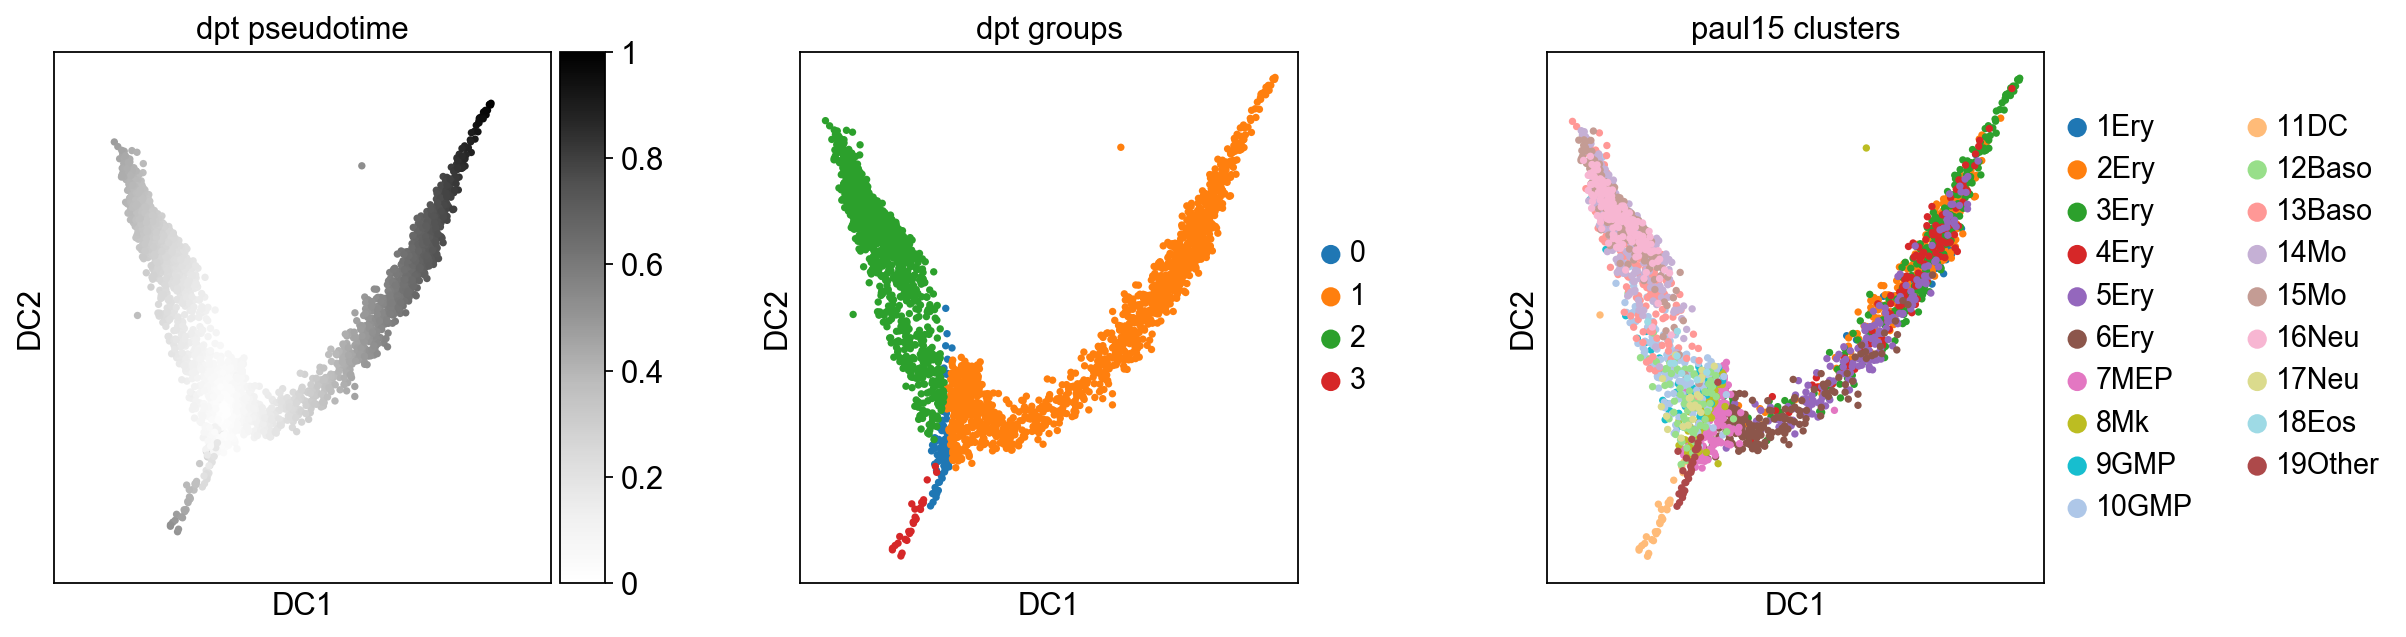

In [4]:
sc.pl.dpt_scatter(adata, color=['dpt_pseudotime', 'dpt_groups', 'paul15_clusters'])

With this, we reproduced the analysis of [Haghverdi *et al.* (2016, Suppl. Note 4 and Suppl. Figure N4)](https://doi.org/10.1038/nmeth.3971).

Save the results.

In [5]:
sc.write('paul15', adata)

writing ./write/paul15.h5


### Visualize with tSNE

It's always good, to look at a second visualization.

In [6]:
sc.tl.tsne(adata)

computing tSNE
    preprocess using PCA with 50 PCs
--> avoid this by setting n_pcs = 0
    using 50 principal components
    using the "MulticoreTSNE" package by Ulyanov (2017)
    finished (0:00:08.541) and added
    "X_tsne", tSNE coordinates (adata.smp)


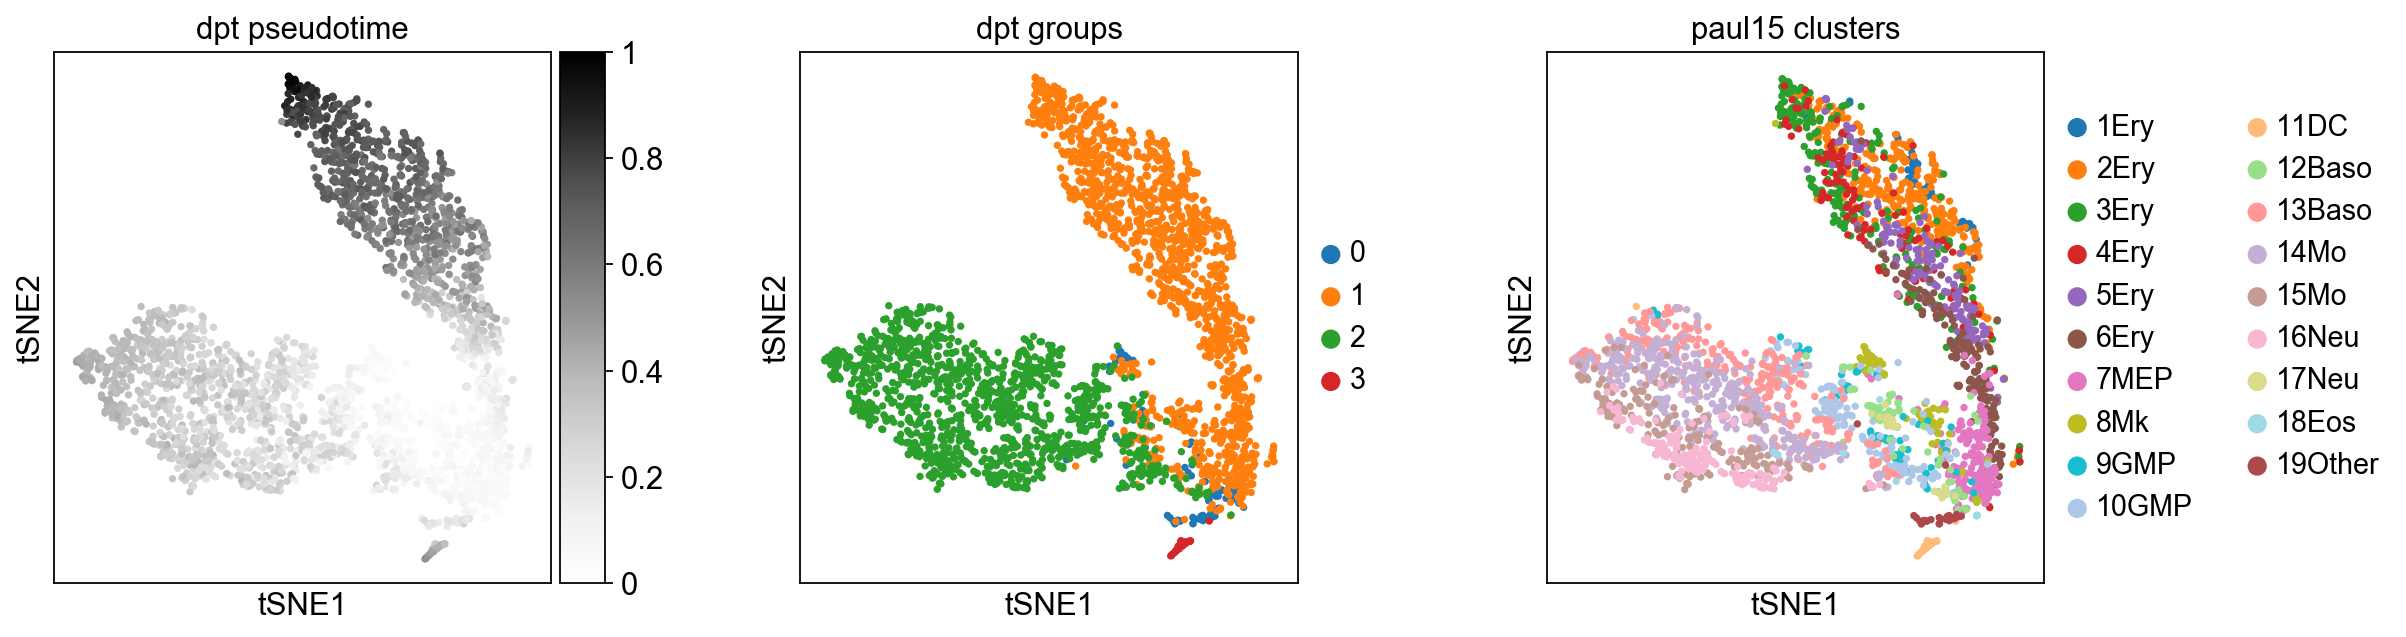

In [7]:
axs = sc.pl.tsne(adata, color=['dpt_pseudotime', 'dpt_groups', 'paul15_clusters'])

### Using a preprocessing recipe

To make the geometry of the data pronounced, select highly variable genes as done by [Zheng *et al.*, (2017)](http://doi.org/10.1038/ncomms14049).

In [8]:
adata = sc.examples.paul15_raw()
sc.pp.recipe_zheng17(adata)

reading sheet data.debatched from file data/paul15/paul15.h5
reading sheet cluster.id from file data/paul15/paul15.h5
reading sheet info.genes_strings from file data/paul15/paul15.h5
normalizing by total count per cell
    finished (0:00:00.075) normalized adata.X and added
    "n_counts_all", counts per cell before normalization (adata.smp)
filter highly varying genes by dispersion and mean (0:00:00.088)
normalizing by total count per cell
    finished (0:00:00.017) normalized adata.X and added
    "n_counts", counts per cell before normalization (adata.smp)


Let us compute the tSNE coordinates for visualization.

computing tSNE
    preprocess using PCA with 50 PCs
--> avoid this by setting n_pcs = 0
    using 50 principal components
    using the "MulticoreTSNE" package by Ulyanov (2017)
    finished (0:00:08.415) and added
    "X_tsne", tSNE coordinates (adata.smp)


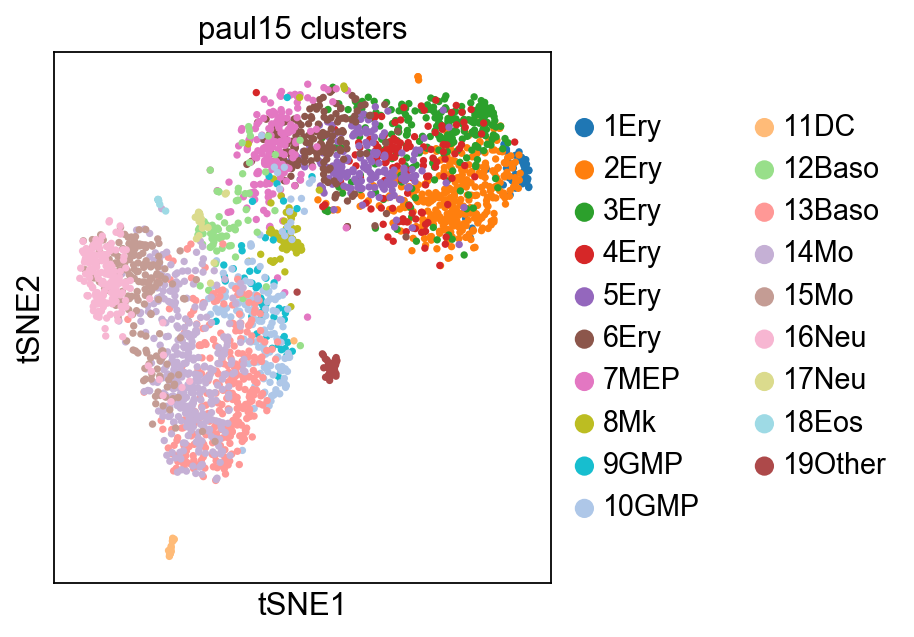

In [9]:
# using Multicore-TSNE
sc.tl.tsne(adata)
axs = sc.pl.tsne(adata, color=['paul15_clusters'])

computing tSNE
    using X_pca for tSNE
    using 50 principal components
    using sklearn.manifold.TSNE with a fix by D. DeTomaso
    finished (0:01:27.319) and added
    "X_tsne", tSNE coordinates (adata.smp)


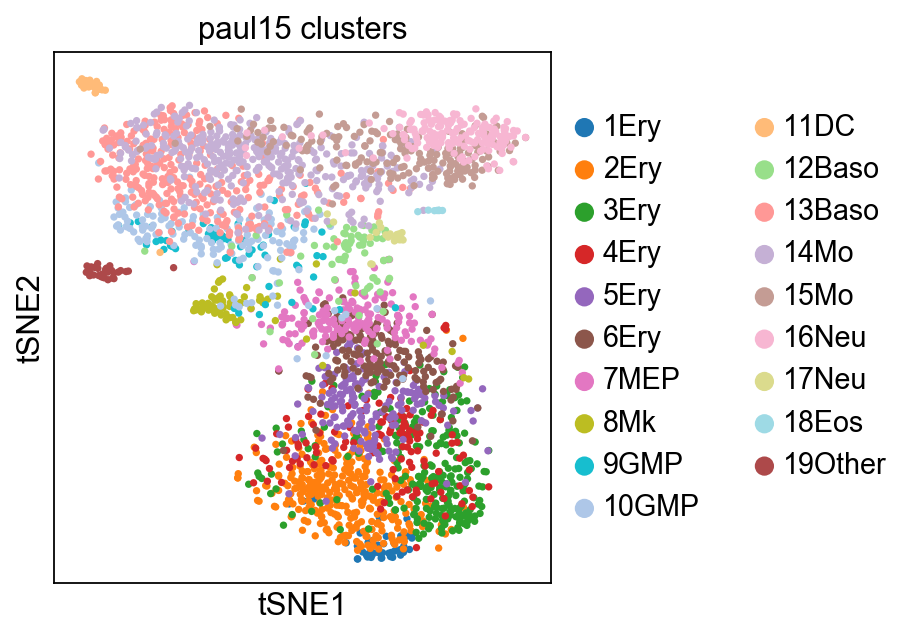

In [10]:
# using sklearn
sc.tl.tsne(adata, use_fast_tsne=False)
axs = sc.pl.tsne(adata, color=['paul15_clusters'])

Detect the single branching into myeloids and erythroids.

In [12]:
sc.tl.dpt(adata, n_branchings=1, n_neighbors=20)

perform Diffusion Pseudotime analysis
    using "X_pca" for building graph
    computing data graph with n_neighbors = 20 
    computing spectral decomposition ("diffmap") with 10 components
    eigenvalues of transition matrix
    [ 1.            0.9909815788  0.9672176242  0.9593729377  0.9407415986
      0.9166148901  0.8894543648  0.8811110258  0.8729974031  0.8642016053]
    detect 1 branching
    do not consider groups with less than 27 points for splitting
    branching 1: split group 0
finished (0:00:01.961) and added
    "dpt_pseudotime", the pseudotime (adata.smp),
    "dpt_groups", the branching subgroups of dpt (adata.smp)
    "dpt_order", order according to groups and increasing pseudtime (adata.smp)


Now DPT finds the branch of dendritic cells.

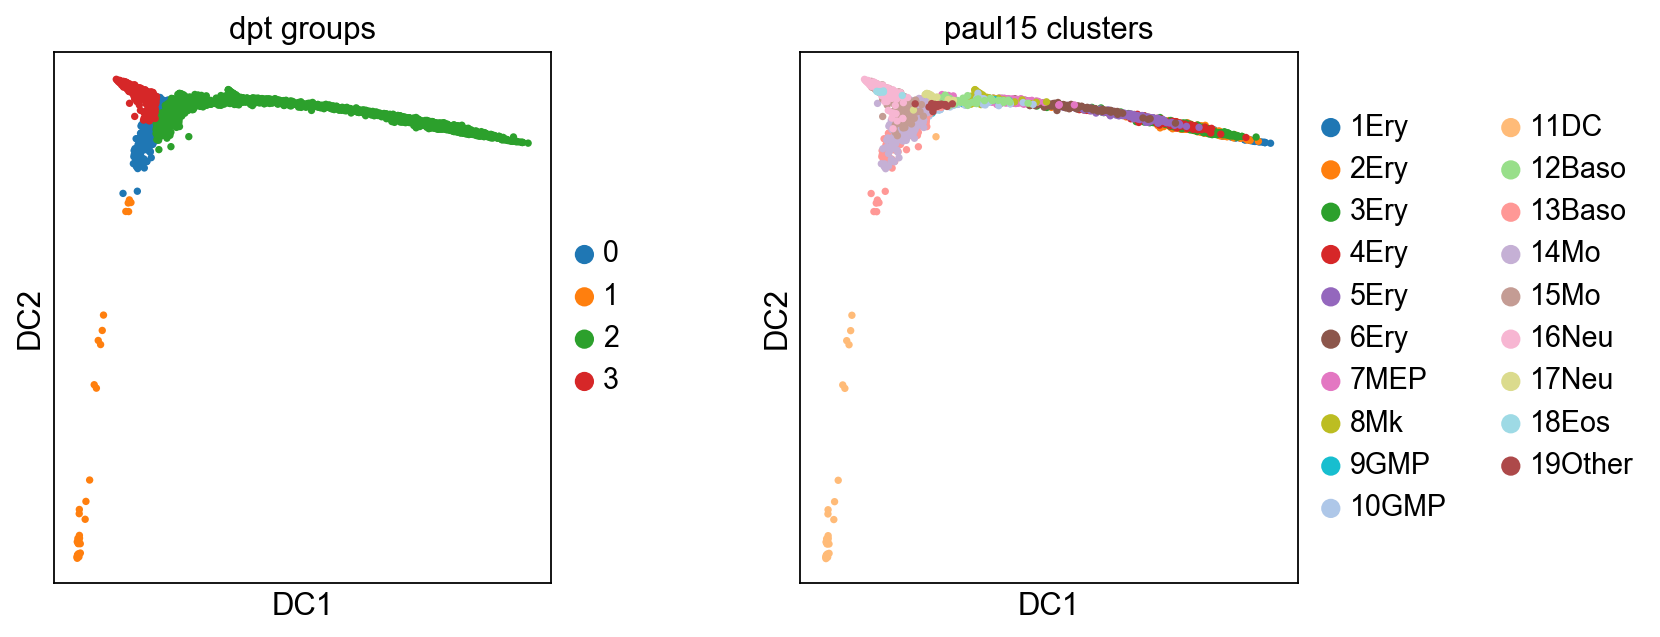

In [13]:
axs = sc.pl.diffmap(adata, color=['dpt_groups', 'paul15_clusters'])

Brnach 3 is solely composed of myeloids, but branch 2 contains erythroids and myeloids.

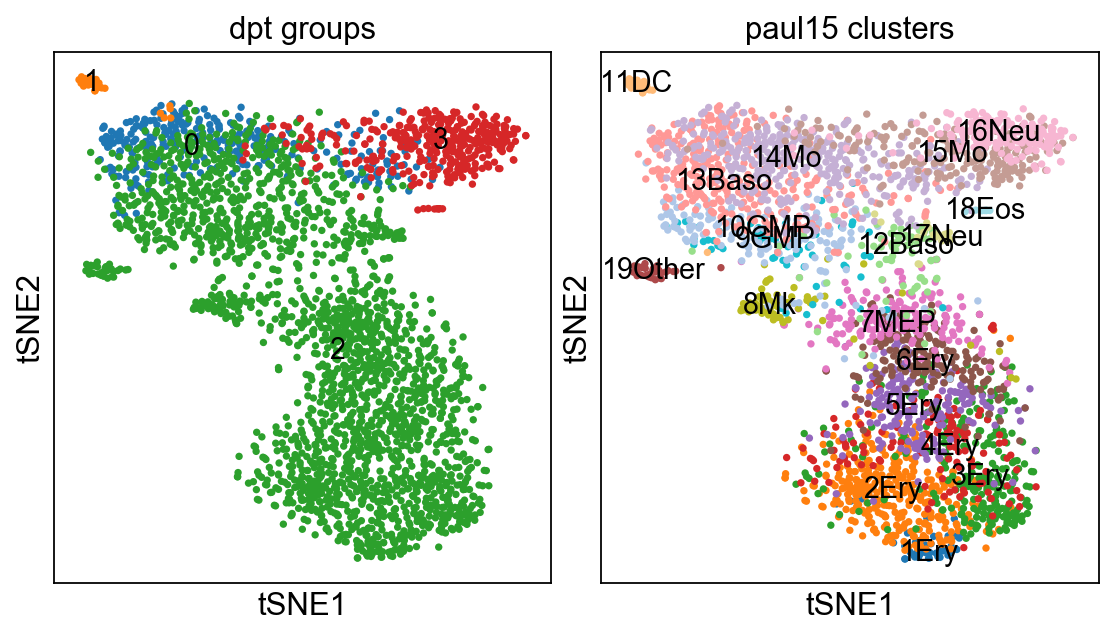

In [14]:
axs = sc.pl.tsne(adata, color=['dpt_groups', 'paul15_clusters'], legend_loc='on data')

Saving the results.

In [15]:
sc.write('paul15', adata)

writing ./write/paul15.h5
